In [55]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("/uscms/home/kyungmip/nobackup/CMSSW_10_6_26/src/iDMe/python_analysis/analysisTools/")
import plotTools as ptools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import coffea files

In [56]:
prefix = './coffea/'
suffix = '_hist_cut8to11'

# Signal
f_sig = "signal_v2_2018_aEM"
sig_histo = util.load(f'{prefix}/{f_sig}{suffix}.coffea')[0]

# Background
bkg_files = {
    # "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

bkg_histos = {}
histograms = []

for b in bkg_files.keys():
    bkg_histos[b] = util.load(f'{prefix}/{bkg_files[b]}{suffix}.coffea')[0]
    histograms = list(bkg_histos[b].keys())

In [57]:
# sig_histo is a dictionary of variables
print(sig_histo.keys())

dict_keys(['sel_vtx_type', 'sel_vtx_sign', 'sel_vtx_dR', 'sel_vtx_dR_over_pT', 'sel_vtx_dR_over_m', 'sel_vtx_dR_over_pTm', 'sel_vtx_dR_over_mpT', 'sel_vtx_chi2', 'sel_vtx_prob', 'sel_vtx_vxy', 'sel_vtx_vxy_zoom', 'sel_vtx_vxy_zoomzoom', 'sel_vtx_vxySignif', 'sel_vtx_mass', 'sel_vtx_minDxy', 'sel_vtx_minDxy_fine', 'sel_vtx_pt', 'sel_vtx_eta', 'sel_vtx_phi', 'sel_vtx_matchType', 'sel_vtx_max_chi2', 'sel_vtx_min_pt', 'sel_vtx_maxPFIso', 'sel_vtx_minEledRj', 'sel_vtx_minEledPhiJ', 'sel_vtx_METdPhi_vs_matchType', 'sel_vtx_minEledRj_vs_matchType', 'sel_vtx_minEledPhiJ_vs_matchType', 'sel_vtx_mindRj', 'sel_vtx_mindPhiJ', 'sel_vtx_mindRj_vs_matchType', 'sel_vtx_mindPhiJ_vs_matchType', 'sel_vtx_mass_vs_mindxy', 'sel_vtx_mass_vs_vxy', 'sel_vtx_METdPhi_vs_chi2', 'sel_vtx_METdPhi_vs_mindxy', 'sel_vtx_METdPhi_vs_vxy', 'sel_vtx_METdPhi_vs_mindPhiJ', 'sel_vtx_METdPhi_vs_mindRj', 'sel_vtx_METdPhi_vs_minEledPhiJ', 'sel_vtx_METdPhi_vs_minEledRj', 'sel_vtx_maxPFIso_vs_mindxy', 'sel_vtx_mindRj_vs_mindxy',

In [58]:
# bkg_histos is a dictionary of dictionary
print(bkg_histos.keys())

dict_keys(['Top', 'DY', 'Diboson', 'Triboson', 'W+jets', 'Z+jets'])


In [59]:
process = 'W+jets'
print(bkg_histos[process].keys())

dict_keys(['sel_vtx_type', 'sel_vtx_sign', 'sel_vtx_dR', 'sel_vtx_dR_over_pT', 'sel_vtx_dR_over_m', 'sel_vtx_dR_over_pTm', 'sel_vtx_dR_over_mpT', 'sel_vtx_chi2', 'sel_vtx_prob', 'sel_vtx_vxy', 'sel_vtx_vxy_zoom', 'sel_vtx_vxy_zoomzoom', 'sel_vtx_vxySignif', 'sel_vtx_mass', 'sel_vtx_minDxy', 'sel_vtx_minDxy_fine', 'sel_vtx_pt', 'sel_vtx_eta', 'sel_vtx_phi', 'sel_vtx_matchType', 'sel_vtx_max_chi2', 'sel_vtx_min_pt', 'sel_vtx_maxPFIso', 'sel_vtx_minEledRj', 'sel_vtx_minEledPhiJ', 'sel_vtx_METdPhi_vs_matchType', 'sel_vtx_minEledRj_vs_matchType', 'sel_vtx_minEledPhiJ_vs_matchType', 'sel_vtx_mindRj', 'sel_vtx_mindPhiJ', 'sel_vtx_mindRj_vs_matchType', 'sel_vtx_mindPhiJ_vs_matchType', 'sel_vtx_mass_vs_mindxy', 'sel_vtx_mass_vs_vxy', 'sel_vtx_METdPhi_vs_chi2', 'sel_vtx_METdPhi_vs_mindxy', 'sel_vtx_METdPhi_vs_vxy', 'sel_vtx_METdPhi_vs_mindPhiJ', 'sel_vtx_METdPhi_vs_mindRj', 'sel_vtx_METdPhi_vs_minEledPhiJ', 'sel_vtx_METdPhi_vs_minEledRj', 'sel_vtx_maxPFIso_vs_mindxy', 'sel_vtx_mindRj_vs_mindxy',

## Access the cutflow information -- Signal

In [60]:
sig_samples = list(sig_histo['cutflow'].keys()) # names of signal sub-process, i.e. mass point, lifetime etc.
print(sig_samples)

['sig_2018_Mchi-55p0_dMchi-10p0_ctau-100', 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-10', 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-1', 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-100', 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-10', 'sig_2018_Mchi-44p0_dMchi-8p0_ctau-100', 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-1', 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-100', 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-10', 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-100', 'sig_2018_Mchi-33p0_dMchi-6p0_ctau-1', 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-1', 'sig_2018_Mchi-33p0_dMchi-6p0_ctau-10', 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-1', 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-100', 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-10', 'sig_2018_Mchi-21p0_dMchi-2p0_ctau-100', 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-10', 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-1', 'sig_2018_Mchi-11p0_dMchi-2p0_ctau-100', 'sig_2018_Mchi-10p5_dMchi-1p0_ctau-100', 'sig_2018_Mchi-21p0_dMchi-2p0_ctau-1', 'sig_2018_Mchi-11p0_dMchi-2p0_ctau-10', 'sig_2018_Mchi-10p5_dMchi-1p0_ctau-10', 'sig_2018_Mchi-11p0_dMchi-2p0_ctau

In [61]:
cuts = list(sig_histo['cutflow'][sig_samples[0]].keys())
print(cuts)

['all', 'initial', 'cut0', 'cut1', 'cut2', 'cut3', 'cut4', 'cut5', 'cut6', 'cut7', 'cut8', 'cut9', 'cut10', 'cut11']


**Based on the signal file name, i.e. sig_2018_Mchi-55p0_dMchi-10p0_ctau-100, extract the mass point, lifetime, etc and make it into a pandas dataframe.**

Use `signalPoint` defined in `/python_analysis/analysisTools/plotTools.py`

In [62]:
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

print(si)

                                        mchi  dmchi   ctau    m1    m2  delta  \
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100  55.0   10.0  100.0  50.0  60.0    0.2   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10   55.0   10.0   10.0  50.0  60.0    0.2   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1    55.0   10.0    1.0  50.0  60.0    0.2   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100   52.5    5.0  100.0  50.0  55.0    0.1   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10    52.5    5.0   10.0  50.0  55.0    0.1   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100   44.0    8.0  100.0  40.0  48.0    0.2   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1     52.5    5.0    1.0  50.0  55.0    0.1   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100   42.0    4.0  100.0  40.0  44.0    0.1   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10    42.0    4.0   10.0  40.0  44.0    0.1   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100   31.5    3.0  100.0  30.0  33.0    0.1   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1     33.0    6.0    1.0  30.0  36.0    0.2   
sig_2018_Mchi-42p0_dMchi-4p0

**There are four cutflow-related variables in the coffea output.**

* `cutDesc`: cut names
* `cutflow`: efficiency = selected events / total events `cutflow[cutName] += np.sum(events.genWgt)/sum_wgt`
* `cutflow_cts`: reweighted by xsec `cutflow_counts[cutName] = xsec*lumi*cutflow[cutName]` 
* `cutflow_nevts`: raw counts `cutflow_nevts[cutName] += len(events)` -- will not be used.

In [63]:
# cutDesc
print(sig_histo['cutDesc'])

print(f"\nex) cut8 corresponds to {sig_histo['cutDesc']['cut8']}")

defaultdict(<class 'str'>, {'all': 'No CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo CutsNo Cuts', 'initial': 'PreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPreselectionPrese

**Access the cut names stored in `cutDesc` via `getCut` defined in `/python_analysis/analysisTools/plotTools.py`.** The function removes the redundant junk in `all` and `initial` steps.

In [64]:
sig_histo['cutDesc'].keys()

dict_keys(['all', 'initial', 'cut0', 'cut1', 'cut2', 'cut3', 'cut4', 'cut5', 'cut6', 'cut7', 'cut8', 'cut9', 'cut10', 'cut11'])

In [98]:
# cutflow
cutNames = {cname:ptools.getCut(sig_histo['cutDesc'][cname]) for cname in sig_histo['cutDesc'].keys()}
print(cutNames)

{'all': 'No Cuts', 'initial': 'Preselection', 'cut0': 'Leading jet |eta| < 2.4', 'cut1': 'Leading jet pT > 80 GeV', 'cut2': 'dPhi(MET,leading jet) > 1.5', 'cut3': 'dPhi(MET,all jets) > 0.75', 'cut4': 'OSSF', 'cut5': 'Vertex chi2/df < 5', 'cut6': 'dPhi(MET,vtx) < 2.5', 'cut7': 'Vertex chi2/df < 3', 'cut8': 'dPhi(MET,vtx) < 1.0', 'cut9': 'm(ee) < 20 GeV', 'cut10': 'dR(ee) < 1.0', 'cut11': 'min(dxy) > 0.01'}


In [99]:
# signal efficiencies by delta/ctau
cf_s = sig_histo['cutflow']
ct_s = sig_histo['cutflow_cts']
desc = sig_histo['cutDesc']

In [100]:
process = 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-100'

print(process)

print(f'\nEfficiency = selected events / total events analyzed from ntuples: {cf_s[process]}')
print(f'\nEvents (xsec weighted): {ct_s[process]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency = selected events / total events analyzed from ntuples: defaultdict(<class 'float'>, {'all': 0.022439342491859922, 'initial': 0.003936879082005989, 'cut0': 0.0037732218980072044, 'cut1': 0.0037700166523811527, 'cut2': 0.0037668156030720556, 'cut3': 0.003506894249911221, 'cut4': 0.002066556013836811, 'cut5': 0.000908132048647387, 'cut6': 0.0008600213364845719, 'cut7': 0.0007766159269644009, 'cut8': 0.0006482350917213912, 'cut9': 0.0006418169380768116, 'cut10': 0.00045897714478702927, 'cut11': 0.0004236409162339411})

Events (xsec weighted): defaultdict(<class 'float'>, {'all': 1.3674894236086068, 'initial': 0.23991970837033733, 'cut0': 0.2299461778046761, 'cut1': 0.22975084500937326, 'cut2': 0.22955576794433766, 'cut3': 0.21371574493357354, 'cut4': 0.12593922897882398, 'cut5': 0.05534301961903809, 'cut6': 0.052411075865837924, 'cut7': 0.047328216801141465, 'cut8': 0.03950448335384725, 'cut9': 0.03911335080478787, 'cut10': 0.027970801345

In [101]:
cut = 'all'

print(process)
print(f'\nEfficiency after {cutNames[cut]}: {cf_s[process][cut]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency after No Cuts: 0.022439342491859922


**Note that the efficiency at 'No Cuts' step is not 1. This is because the efficiency at this step is the efficiency of the base selections (MET trigger, MET cut etc) applied to the ntuples by the skimmer before we ran the coffea analyzer. In other words, this is 'no cut' from the point of `coffea` analyzer, but base cuts already have been applied by the skimmer.**

In [102]:
cut = 'initial'

print(process)
print(f'\nEfficiency after {cutNames[cut]}: {cf_s[process][cut]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency after Preselection: 0.003936879082005989


**The efficiency at 'Preselection' step corresponds to the efficiency after requiring that there is at least one good vertex of the lepton jets. This preselection is defined in `L132-135` in `/python_analysis/analysisTools/skimmerTools.py`**

`selectExistingGoodVtx` in `/python_analysis/analysisTools/analysisSubroutines.py` saves `good_vtx` of di-electrons that pass the selections, out of all `vtx`. Then, the code requires that there's at least one `good_vtx` in the event (this is the **preselection**). From the `good_vtx`, pick the "best" one based on their chi2/ndf. `vtx` is saved from the ntuplizer in `/iDMeSkimmer/plugins/iDMeSkimmer.cc` 

In [103]:
cut = 'cut0'

print(process)
print(f'\nEfficiency after {cutNames[cut]}: {cf_s[process][cut]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency after Leading jet |eta| < 2.4: 0.0037732218980072044


### Access the cutflow of the signal based on mass point, lifetime, etc

In [104]:
deltas = sorted(list(set(si.delta)))

print(f'deltas: {deltas}')

deltas: [0.1, 0.2]


In [105]:
delta = deltas[0]

m1s = sorted(list(set(si[si.delta==delta].m1)))
ctaus = sorted(list(set(si[si.delta==delta].ctau)))

print(f'For delta = {delta}: m1 = {m1s}, ctaus = {ctaus}')

For delta = 0.1: m1 = [10.0, 20.0, 30.0, 40.0, 50.0], ctaus = [1.0, 10.0, 100.0]


In [106]:
delta = deltas[0]
m1 = m1s[0]
ct = ctaus[0]

pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
print(f'Signal sample with delta = {delta}, m1 = {m1}, ct = {ct}: {pt}\n')

effs = [cf_s[pt][cut] for cut in cuts]
print(f'Efficiency after each cut: {effs}')

Signal sample with delta = 0.1, m1 = 10.0, ct = 1.0: sig_2018_Mchi-10p5_dMchi-1p0_ctau-1

Efficiency after each cut: [0.016410498109340955, 0.003548886424581602, 0.003236635650939087, 0.003236635650939087, 0.003236635650939087, 0.0031732891034976897, 0.0020310453218055947, 0.0010471051912829819, 0.0010418046894589655, 0.0009942192452726077, 0.0009519349997706445, 0.0009413552655132765, 0.0008409024784588072, 0.000459982946835193]


## Display the efficiency as pandas dataframe

In [197]:
columns = list(cf_s.keys())
columns

['sig_2018_Mchi-55p0_dMchi-10p0_ctau-100',
 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-10',
 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-1',
 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-100',
 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-10',
 'sig_2018_Mchi-44p0_dMchi-8p0_ctau-100',
 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-1',
 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-100',
 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-10',
 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-100',
 'sig_2018_Mchi-33p0_dMchi-6p0_ctau-1',
 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-1',
 'sig_2018_Mchi-33p0_dMchi-6p0_ctau-10',
 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-1',
 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-100',
 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-10',
 'sig_2018_Mchi-21p0_dMchi-2p0_ctau-100',
 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-10',
 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-1',
 'sig_2018_Mchi-11p0_dMchi-2p0_ctau-100',
 'sig_2018_Mchi-10p5_dMchi-1p0_ctau-100',
 'sig_2018_Mchi-21p0_dMchi-2p0_ctau-1',
 'sig_2018_Mchi-11p0_dMchi-2p0_ctau-10',
 'sig_2018_Mchi-10p5_dMchi-1p0_ctau-10',
 'sig_2018_

In [199]:
efficiency = {c: [ cf_s[samp][c] for samp in columns ] for c in cuts}

efficiency

{'all': [0.022439342491859922,
  0.03112463103097606,
  0.03382568049132571,
  0.02248783832772603,
  0.032302303564755226,
  0.01775914128938934,
  0.03627952660823992,
  0.01743353544833836,
  0.025433298915125066,
  0.013494327471434184,
  0.020121081940886035,
  0.02932291593738672,
  0.01965726254655494,
  0.017076425623838834,
  0.01037430176057215,
  0.02004946229340967,
  0.010686411064682556,
  0.01570980763222335,
  0.023166914597704105,
  0.007817563025904044,
  0.007993912114981266,
  0.01866072885359875,
  0.012367865381780604,
  0.012222185193762131,
  0.014369239132982211,
  0.016410498109340955,
  0.016532767426995935],
 'initial': [0.003936879082005989,
  0.0073991301849392,
  0.009426377158027164,
  0.003784854421480433,
  0.00668489393143882,
  0.002968628761355613,
  0.00906880898234895,
  0.002764904371053314,
  0.005107033283606849,
  0.00207591401989059,
  0.00508172889872024,
  0.007164697512306507,
  0.0037792386547465667,
  0.004064527050343481,
  0.0015455368

In [211]:
eff_df = pd.DataFrame.from_dict(efficiency).transpose()
eff_df.columns = columns

labels = [cutNames[c] for c in cuts]
# Replace "No Cuts" with "Preselections" and "Preselection" with "n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Preselection', 'n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No Cuts', 'Preselections'), cut))

eff_df.index = cut

In [212]:
eff_df

,sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,sig_2018_Mchi-44p0_dMchi-8p0_ctau-100,sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,...,sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,sig_2018_Mchi-31p5_dMchi-3p0_ctau-1,sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,sig_2018_Mchi-21p0_dMchi-2p0_ctau-10
Preselections,0.022439,0.031125,0.033826,0.022488,0.032302,0.017759,0.036280,0.017434,0.025433,0.013494,...,0.015710,0.023167,0.007818,0.007994,0.018661,0.012368,0.012222,0.014369,0.016410,0.016533
n(good vertex) > 0,0.003937,0.007399,0.009426,0.003785,0.006685,0.002969,0.009069,0.002765,0.005107,0.002076,...,0.003009,0.005055,0.001022,0.001134,0.003894,0.002165,0.002185,0.003113,0.003549,0.003026
Leading jet |eta| < 2.4,0.003773,0.006951,0.008983,0.003632,0.006265,0.002807,0.008595,0.002638,0.004902,0.001951,...,0.002827,0.004816,0.000942,0.001043,0.003716,0.002007,0.002033,0.002910,0.003237,0.002869
Leading jet pT > 80 GeV,0.003770,0.006951,0.008983,0.003632,0.006265,0.002807,0.008583,0.002638,0.004902,0.001951,...,0.002827,0.004816,0.000939,0.001043,0.003716,0.002007,0.002033,0.002910,0.003237,0.002865
"dPhi(MET,leading jet) > 1.5",0.003767,0.006951,0.008983,0.003632,0.006265,0.002807,0.008583,0.002638,0.004902,0.001951,...,0.002827,0.004816,0.000939,0.001043,0.003716,0.002007,0.002033,0.002910,0.003237,0.002865
"dPhi(MET,all jets) > 0.75",0.003507,0.006675,0.008672,0.003456,0.006105,0.002571,0.008508,0.002522,0.004792,0.001877,...,0.002711,0.004763,0.000875,0.001007,0.003677,0.001872,0.001983,0.002849,0.003173,0.002808
OSSF,0.002067,0.004605,0.006361,0.002004,0.004001,0.001533,0.005905,0.001411,0.003073,0.001015,...,0.001689,0.003081,0.000458,0.000547,0.002461,0.001194,0.001230,0.001931,0.002031,0.001733
Vertex chi2/df < 5,0.000908,0.002906,0.004360,0.000735,0.002262,0.000640,0.003587,0.000576,0.001609,0.000394,...,0.000951,0.001833,0.000200,0.000199,0.001432,0.000633,0.000607,0.001182,0.001047,0.000869
"dPhi(MET,vtx) < 2.5",0.000860,0.002889,0.004316,0.000693,0.002204,0.000616,0.003500,0.000535,0.001574,0.000365,...,0.000938,0.001797,0.000175,0.000176,0.001401,0.000603,0.000591,0.001148,0.001042,0.000850
Vertex chi2/df < 3,0.000777,0.002734,0.004005,0.000623,0.002016,0.000579,0.003239,0.000482,0.001520,0.000318,...,0.000853,0.001620,0.000161,0.000161,0.001316,0.000531,0.000534,0.001040,0.000994,0.000788


In [213]:
delta = deltas[0]
m1 = m1s[0]
ct = ctaus[0]

pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]

eff_df[pt]

Preselections                  0.016410
n(good vertex) > 0             0.003549
Leading jet |eta| < 2.4        0.003237
Leading jet pT > 80 GeV        0.003237
dPhi(MET,leading jet) > 1.5    0.003237
dPhi(MET,all jets) > 0.75      0.003173
OSSF                           0.002031
Vertex chi2/df < 5             0.001047
dPhi(MET,vtx) < 2.5            0.001042
Vertex chi2/df < 3             0.000994
dPhi(MET,vtx) < 1.0            0.000952
m(ee) < 20 GeV                 0.000941
dR(ee) < 1.0                   0.000841
min(dxy) > 0.01                0.000460
Name: sig_2018_Mchi-10p5_dMchi-1p0_ctau-1, dtype: float64

## Plot the efficiency

In [164]:
def plot_efficiency_signal(df_sig, dict_eff, cuts, cutNames, m1, delta, ct, doLog=True, doSave=False, outDir = 'plots/cutflow/', outName='efficiency.png'):
    pt = df_sig[(df_sig.delta==delta) & (df_sig.m1==m1) & (df_sig.ctau==ct)].name[0]
    effs = [dict_eff[pt][cut] for cut in cuts]

    plt.plot( np.arange(len(cuts)), effs )

    if doLog:
        plt.yscale('log')

    plt.ylabel('Efficiency')
    
    labels = [cutNames[c] for c in cuts]
    # Replace "No Cuts" with "Preselections" and "Preselection" with "n(good vertex) > 0"
    cut = list(map(lambda x: x.replace('Preselection', 'n(good vertex) > 0'), labels))
    cut = list(map(lambda x: x.replace('No Cuts', 'Preselections'), cut))
    
    plt.xticks(ticks = np.arange(len(cuts)), labels = cut, rotation = 45, ha = 'right')

    plt.grid()

    plt.title(r"$M_1 = {}$ GeV, $\Delta = {:.1f}$, $c\tau = {}$ mm".format(m1, delta, ct))
    
    if doSave:
        if not os.path.isdir(outDir):
            os.makedirs(outDir)
        plt.savefig(f'{outDir}/{outName}')
        print(f'Saved: {outDir}/{outName}')

Saved: plots/cutflow//efficiency_m1_10.0_delta_0.1_ct_1.0.png


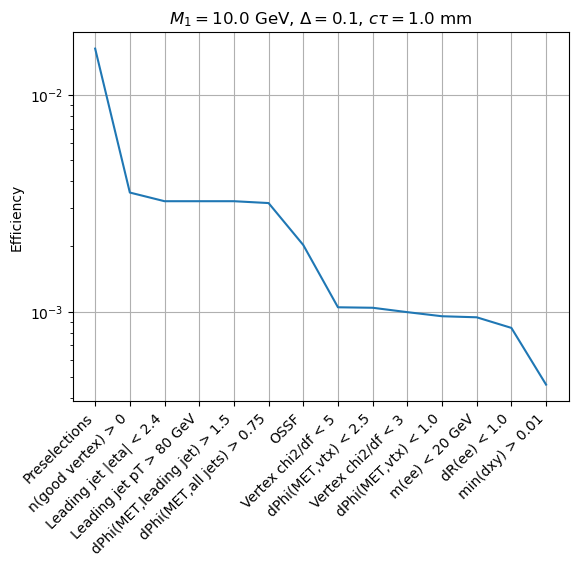

In [165]:
delta = deltas[0]
m1 = m1s[0]
ct = ctaus[0]

plot_efficiency_signal( df_sig = si, dict_eff = cf_s, cuts = cuts, cutNames = cutNames, 
                        m1 = m1, delta = delta, ct = ct, 
                        doSave = True, outDir = 'plots/cutflow/', outName = f'efficiency_m1_{m1}_delta_{delta}_ct_{ct}.png')

### Plot the efficiency with varying m1's overlaid

In [166]:
def plot_efficiency_signal_varying_M1(df_sig, dict_eff, cuts, cutNames, delta, ct, doLog=True, doSave=False, outDir = 'plots/cutflow/', outName='efficiency.png'):
    m1s = sorted(list(set(df_sig[(df_sig.delta==delta)&(df_sig.ctau==ct)].m1)))
        
    for m1 in m1s:
        pt = df_sig[(df_sig.delta==delta) & (df_sig.m1==m1) & (df_sig.ctau==ct)].name[0]
        effs = [dict_eff[pt][cut] for cut in cuts]
        plt.plot(np.arange(len(cuts)), effs, label=r"$M_1 = {0}$ GeV".format(m1), color=f"C{m1s.index(m1)}")

    if doLog:
        plt.yscale('log')

    plt.ylabel('Efficiency')
    
    labels = [cutNames[c] for c in cuts]
    # Replace "No Cuts" with "Preselections" and "Preselection" with "n(good vertex) > 0"
    cut = list(map(lambda x: x.replace('Preselection', 'n(good vertex) > 0'), labels))
    cut = list(map(lambda x: x.replace('No Cuts', 'Preselections'), cut))
    
    plt.xticks(ticks = np.arange(len(cuts)), labels = cut, rotation = 45, ha = 'right')

    plt.grid()

    plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))

    plt.legend()
    
    if doSave:
        if not os.path.isdir(outDir):
            os.makedirs(outDir)
        plt.savefig(f'{outDir}/{outName}')
        print(f'Saved: {outDir}/{outName}')

Saved: plots/cutflow//efficiency_delta_0.1_ct_1.0.png


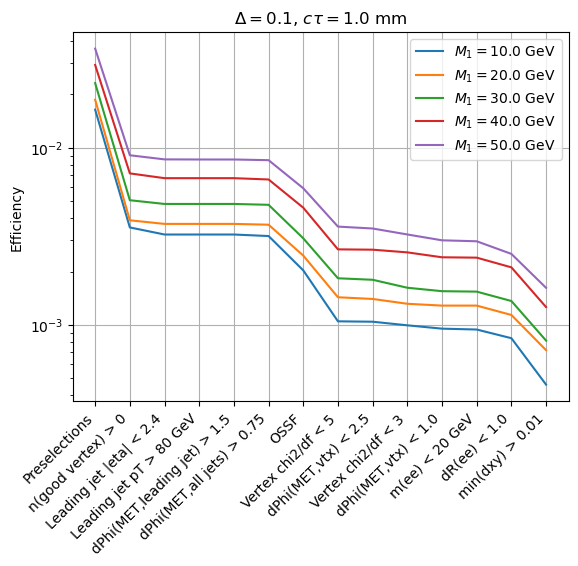

In [167]:
delta = deltas[0]
ct = ctaus[0]

plot_efficiency_signal_varying_M1( df_sig = si, dict_eff = cf_s, cuts = cuts, cutNames = cutNames, 
                                   delta = delta, ct = ct,
                                   doSave = True, outDir = 'plots/cutflow/', outName = f'efficiency_delta_{delta}_ct_{ct}.png')

### Plot with various ctaus on one axis

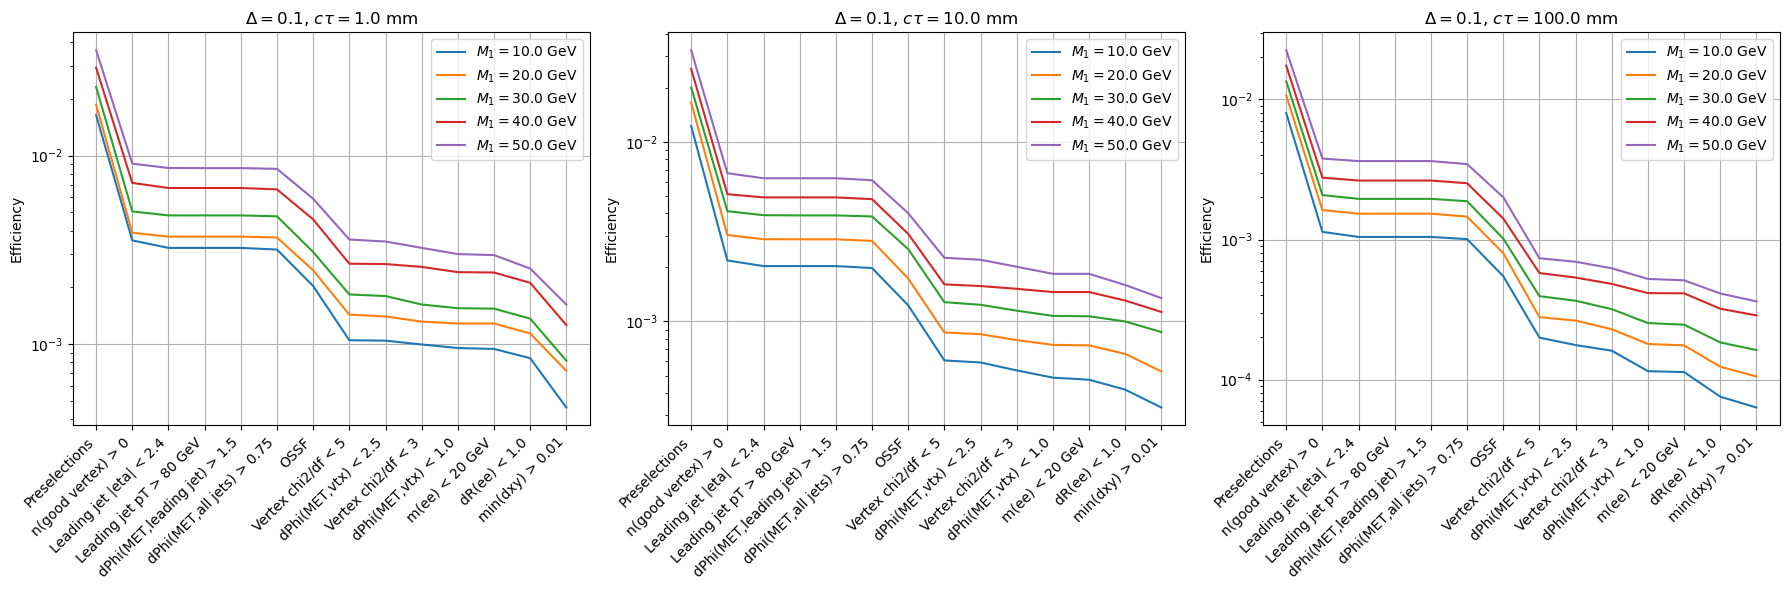

In [171]:
delta = deltas[0]
ctaus = sorted(list(set(si[si.delta==delta].ctau)))

fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))

for i, ct in enumerate(ctaus):
    plt.sca(axes[i])
    plot_efficiency_signal_varying_M1( df_sig = si, dict_eff = cf_s, cuts = cuts, cutNames = cutNames, 
                                       delta = delta, ct = ct )
    #plt.savefig(f'plots/cutflow/efficiency_delta_{delta}.png')
plt.tight_layout()
plt.show()

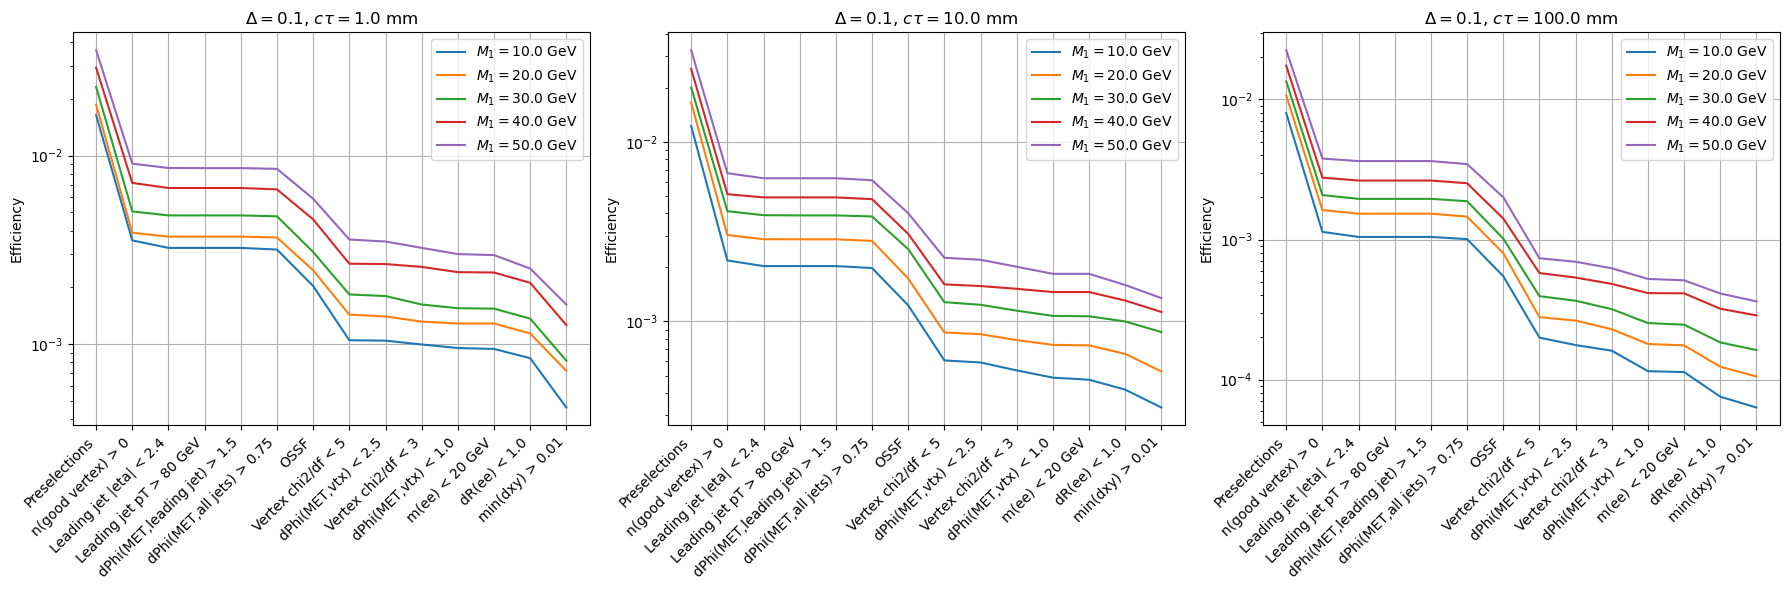

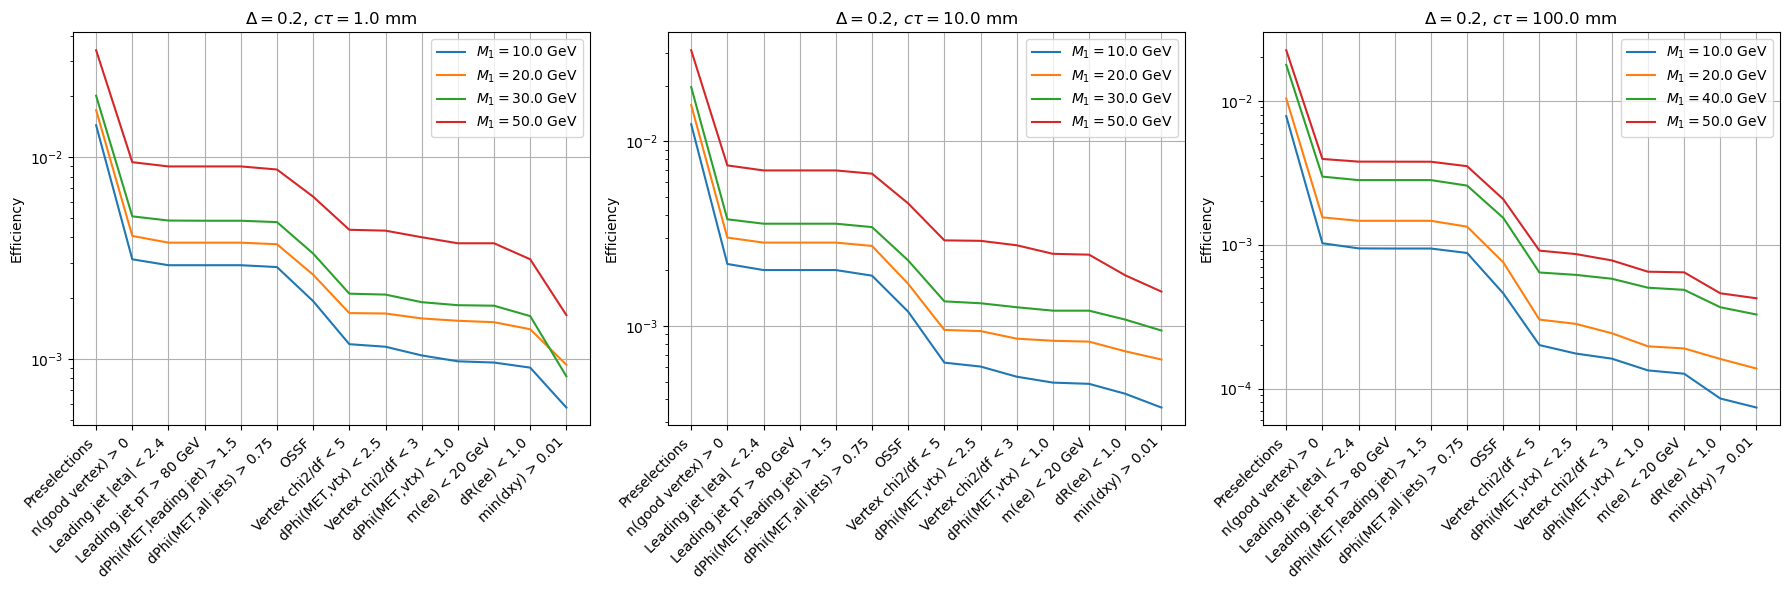

In [172]:
for delta in deltas:
    ctaus = sorted(list(set(si[si.delta==delta].ctau)))
    
    fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
    
    for i, ct in enumerate(ctaus):
        plt.sca(axes[i])
        plot_efficiency_signal_varying_M1( df_sig = si, dict_eff = cf_s, cuts = cuts, cutNames = cutNames, 
                                           delta = delta, ct = ct )
        #plt.savefig(f'plots/cutflow/efficiency_delta_{delta}.png')
    plt.tight_layout()
    plt.show()